# 칼럼명

- 고객ID: 데이터셋 내 각 고객이나 레코드를 식별하는 고유한 식별자입니다.

- 성별: 고객의 성별을 나타내는 열로, 남성 또는 여성을 나타낼 것으로 예상됩니다.

- 나이: 고객의 나이를 나타내는 열로, 고객의 연령일 것으로 예상됩니다.

- 운전면허증: 고객이 유효한 운전 면허증을 소지하고 있는지를 나타내는 열입니다.

- 지역 코드: 고객의 지역이나 위치를 나타내는 열로, 지역 코드일 것으로 예상됩니다.

- 이전에 보험 가입 여부: 고객이 이전에 보험에 가입했는지 여부를 나타내는 열입니다.

- 차량 연령: 차량의 연식을 나타내는 열로, 차량의 연령일 것으로 예상됩니다.

- 차량 손상: 차량에 입은 손상 정도를 나타내는 열로, 차량 손상 여부일 것으로 예상됩니다.

- 연간 보험료: 고객이 지불하는 연간 보험료를 나타내는 열입니다.

- 보험 가입 채널: 보험 계약을 맺은 판매 채널을 나타내는 열로, 판매 채널일 것으로 예상됩니다.

- 고객 계약 연령: 고객의 보험 계약 연령을 나타내는 열로, 보험 계약의 연령일 것으로 예상됩니다.

# 데이터 불러오기(보험 교차판매 이진분류)


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("/Users/lyeajin/Downloads/playground-series-s4e7/보험이진분류train.csv")

In [ ]:
sample_submission = pd.read_csv("/content/drive/MyDrive/DNA/2024-1 보험 이진 분류/sample_submission.csv", encoding='utf-8')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022691 entries, 0 to 2022690
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   float64
 3   Driving_License       float64
 4   Region_Code           float64
 5   Previously_Insured    float64
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               float64
 11  Response              float64
dtypes: float64(8), int64(1), object(3)
memory usage: 185.2+ MB


In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21.0,1.0,35.0,0.0,1-2 Year,Yes,65101.0,124.0,187.0,0.0
1,1,Male,43.0,1.0,28.0,0.0,> 2 Years,Yes,58911.0,26.0,288.0,1.0
2,2,Female,25.0,1.0,14.0,1.0,< 1 Year,No,38043.0,152.0,254.0,0.0
3,3,Female,35.0,1.0,1.0,0.0,1-2 Year,Yes,2630.0,156.0,76.0,0.0
4,4,Female,36.0,1.0,15.0,1.0,1-2 Year,No,31951.0,152.0,294.0,0.0


In [ ]:
train.isnull().sum()

id                      0
Gender                  0
Age                     1
Driving_License         1
Region_Code             1
Previously_Insured      1
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

In [ ]:
train.iloc[train.Policy_Sales_Channel.index[train.Policy_Sales_Channel.isna()]]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
19067,19067,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     1
Driving_License         1
Region_Code             1
Previously_Insured      1
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129735 entries, 0 to 129734
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    129735 non-null  int64  
 1   Gender                129735 non-null  object 
 2   Age                   129734 non-null  float64
 3   Driving_License       129734 non-null  float64
 4   Region_Code           129734 non-null  float64
 5   Previously_Insured    129734 non-null  float64
 6   Vehicle_Age           129734 non-null  object 
 7   Vehicle_Damage        129734 non-null  object 
 8   Annual_Premium        129734 non-null  float64
 9   Policy_Sales_Channel  129734 non-null  float64
 10  Vintage               129734 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.9+ MB


In [ ]:
test.iloc[test.Policy_Sales_Channel.index[test.Policy_Sales_Channel.isna()]]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
129734,11634532,Mal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train[train['Driving_License'] == 0]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
471,Male,51,0,15.0,1,1-2 Year,No,29130.0,26.0,221.0,0.0
605,Female,68,0,3.0,0,1-2 Year,No,33002.0,155.0,107.0,0.0
640,Male,71,0,28.0,1,1-2 Year,No,32732.0,26.0,257.0,0.0
1463,Male,59,0,45.0,1,1-2 Year,No,39262.0,124.0,282.0,0.0
1520,Male,52,0,8.0,0,1-2 Year,No,48647.0,26.0,134.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
74637,Male,69,0,48.0,0,1-2 Year,Yes,2630.0,26.0,242.0,0.0
74741,Male,52,0,7.0,0,1-2 Year,Yes,2630.0,26.0,100.0,0.0
75160,Male,64,0,28.0,1,1-2 Year,No,30177.0,122.0,215.0,0.0
75265,Female,61,0,28.0,0,1-2 Year,Yes,33702.0,26.0,111.0,0.0


# 시각화

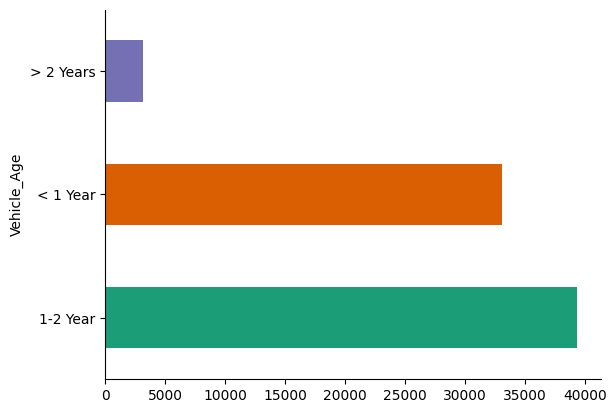

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('Vehicle_Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

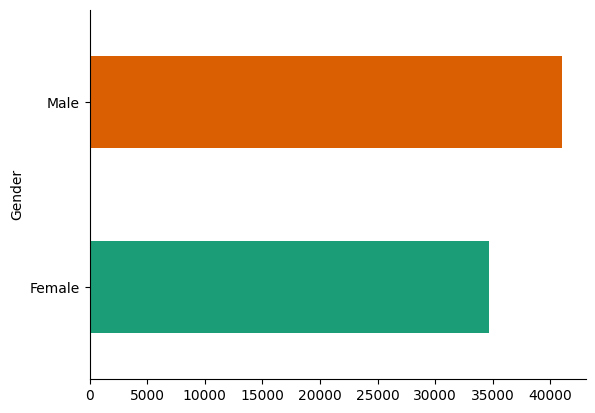

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

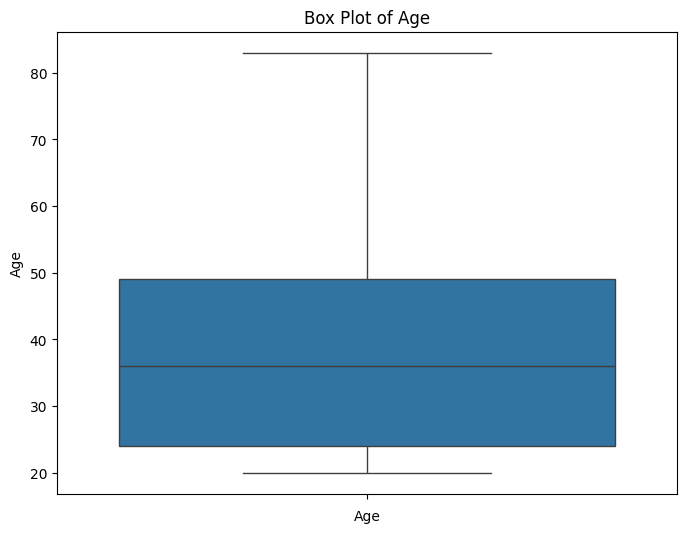

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


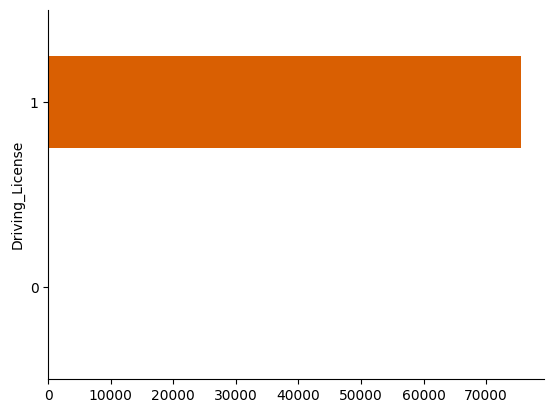

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('Driving_License').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 건강 보험 교차 판매 예측 데이터



In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/DNA/2024-1 보험 이진 분류/train-4.csv", encoding='utf-8')

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/DNA/2024-1 보험 이진 분류/test-6.csv", encoding='utf-8')

In [ ]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


In [ ]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

In [ ]:
train_df.iloc[train_df.Policy_Sales_Channel.index[train_df.Policy_Sales_Channel.isna()]]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
168905,168906,Male,48,1,28.0,0,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

# 두 데이터 활용

In [ ]:
train_df.drop('id', axis=1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168901,Female,31,1,30.0,0,< 1 Year,No,27385.0,26.0,137.0,0.0
168902,Female,52,1,28.0,0,1-2 Year,Yes,35158.0,26.0,142.0,1.0
168903,Female,50,1,28.0,1,1-2 Year,No,2630.0,26.0,109.0,0.0
168904,Male,74,1,46.0,0,1-2 Year,Yes,2630.0,122.0,29.0,0.0


In [ ]:
filtered_df = train_df[
    (train_df['Gender'] == 'Female') &
    (train_df['Vehicle_Age'] == '< 1 Year') &
    (train_df['Age'] == 27) &
    (train_df['Region_Code']== 15.0) &
    (train_df['Previously_Insured'] == 0) &
    (train_df['Vehicle_Damage'] == 'No')
]

print("Filtered Rows:")
print(filtered_df)

Filtered Rows:
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
629        630  Female   27                1         15.0                   0   
7860      7861  Female   27                1         15.0                   0   
12429    12430  Female   27                1         15.0                   0   
15551    15552  Female   27                1         15.0                   0   
24692    24693  Female   27                1         15.0                   0   
60723    60724  Female   27                1         15.0                   0   
94880    94881  Female   27                1         15.0                   0   
97312    97313  Female   27                1         15.0                   0   
108774  108775  Female   27                1         15.0                   0   
110002  110003  Female   27                1         15.0                   0   
114628  114629  Female   27                1         15.0                   0   
126630  12663

In [ ]:
filtered_df = test_df[
    (test_df['Gender'] == 'Female') &
    (test_df['Vehicle_Age'] == '< 1 Year') &
    (test_df['Age'] == 27) &
    (test_df['Region_Code']== 15.0) &
    (test_df['Previously_Insured'] == 0) &
    (test_df['Vehicle_Damage'] == 'No')
]

print("Filtered Rows:")
print(filtered_df)

Filtered Rows:
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
17252   398362  Female   27                1         15.0                   0   
19876   400986  Female   27                1         15.0                   0   
40813   421923  Female   27                1         15.0                   0   
47769   428879  Female   27                1         15.0                   0   
60470   441580  Female   27                1         15.0                   0   
65074   446184  Female   27                1         15.0                   0   
68411   449521  Female   27                1         15.0                   0   
68774   449884  Female   27                1         15.0                   0   
73206   454316  Female   27                1         15.0                   0   
96993   478103  Female   27                1         15.0                   0   
99370   480480  Female   27                1         15.0                   0   
113542  49465

# 전처리

- id 열 제거
- train 결측치

 → Policy_Sales_Channel = 152.0

 → Vintage = 140.0

 → Response = 0.0

- test 결측치 → 제거
- Gender, Vehicle_Damage, Vehicle_Age → 숫자형으로 변경

In [ ]:
train.drop('id', axis=1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187.0,0.0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288.0,1.0
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254.0,0.0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76.0,0.0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
75667,Male,44,1,43.0,0,1-2 Year,Yes,2630.0,124.0,43.0,1.0
75668,Male,25,1,40.0,0,< 1 Year,Yes,33379.0,152.0,26.0,0.0
75669,Female,57,1,29.0,0,1-2 Year,Yes,29824.0,163.0,119.0,0.0
75670,Female,42,1,33.0,0,1-2 Year,Yes,36185.0,124.0,188.0,1.0


In [ ]:
test.drop('id', axis=1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,20.0,1.0,47.0,0.0,< 1 Year,No,2630.0,160.0,228.0
1,Male,47.0,1.0,28.0,0.0,1-2 Year,Yes,37483.0,124.0,123.0
2,Male,47.0,1.0,43.0,0.0,1-2 Year,Yes,2630.0,26.0,271.0
3,Female,22.0,1.0,47.0,1.0,< 1 Year,No,24502.0,152.0,115.0
4,Male,51.0,1.0,19.0,0.0,1-2 Year,No,34115.0,124.0,148.0
...,...,...,...,...,...,...,...,...,...,...
129730,Female,50.0,1.0,36.0,0.0,1-2 Year,Yes,29679.0,26.0,43.0
129731,Female,50.0,1.0,45.0,0.0,1-2 Year,Yes,2630.0,26.0,32.0
129732,Male,26.0,1.0,46.0,1.0,< 1 Year,No,30255.0,152.0,77.0
129733,Female,31.0,1.0,26.0,0.0,1-2 Year,Yes,27341.0,155.0,239.0


In [ ]:
train['Policy_Sales_Channel'].fillna(152.0, inplace=True)

In [ ]:
train['Vintage'].fillna(140.0, inplace=True)

In [ ]:
train['Response'].fillna(0.0, inplace=True)

In [ ]:
test.dropna(subset=['Policy_Sales_Channel'], inplace=True)

In [ ]:
train['Gender'] = train['Gender'].replace({'Male': 0, 'Female': 1})
test['Gender'] = test['Gender'].replace({'Male': 0, 'Female': 1})

In [ ]:
train['Vehicle_Age'] = train['Vehicle_Age'].replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
test['Vehicle_Age'] = test['Vehicle_Age'].replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [ ]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})
test['Vehicle_Damage'] = test['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})

# 모델링 - LogisticRegression

In [ ]:
# 예제: X와 y로 데이터 분할
X = train.drop('Response', axis=1)  # 입력 특성들
y = train['Response']  # 타겟 변수 (이진 분류의 경우 0 또는 1)

# 훈련 데이터와 테스트 데이터 분리 (예제: 80% 훈련 데이터, 20% 테스트 데이터)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 초기화 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# 테스트 데이터에 대해 예측
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 양성 클래스에 대한 예측 확률을 사용

# ROC AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {auc:.2f}')

ROC AUC Score: 0.63


# 모델링 - 결정트리(Decision Tree)

In [ ]:
# 예제: X와 y로 데이터 분할
X = train.drop('Response', axis=1)  # 입력 특성들
y = train['Response']  # 타겟 변수 (이진 분류의 경우 0 또는 1)

# 훈련 데이터와 테스트 데이터 분리 (예제: 80% 훈련 데이터, 20% 테스트 데이터)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# 모델 초기화 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측 확률 계산
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# ROC AUC 계산
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f'Decision Tree ROC AUC Score: {auc_dt:.2f}')

Decision Tree ROC AUC Score: 0.60
